<a href="https://colab.research.google.com/github/Charishmaaaa/demo/blob/main/ICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


data = pd.read_csv('diabetes(1).csv', header=None).values

X = data[:, 0:8]
y = data[:, 8]


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=87)

np.random.seed(155)


my_nn = Sequential()


my_nn.add(Dense(20, input_dim=8, activation='relu'))
my_nn.add(Dense(20, activation='relu'))
my_nn.add(Dense(1, activation='sigmoid'))


my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


my_nn.fit(X_train, Y_train, epochs=100, initial_epoch=0)

print(my_nn.summary())


evaluation = my_nn.evaluate(X_test, Y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 4.7878 - accuracy: 0.5799
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 2.0614 - accuracy: 0.5347
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 1.4901 - accuracy: 0.5590
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 1.2446 - accuracy: 0.5868
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 1.0600 - accuracy: 0.6111
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9398 - accuracy: 0.6215
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8287 - accuracy: 0.6094
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8222 - accuracy: 0.6597
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7963 - accuracy: 0.6076
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7292 - accuracy: 0.6319
Epoch 11/

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


data = pd.read_csv('diabetes(1).csv', header=None).values

X = data[:, 0:8]
y = data[:, 8]


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=87)

np.random.seed(155)


my_nn = Sequential()


my_nn.add(Dense(20, input_dim=8, activation='tanh'))
my_nn.add(Dense(1, activation='sigmoid'))


my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


my_nn.fit(X_train, Y_train, epochs=100, initial_epoch=0)


print(my_nn.summary())


evaluation = my_nn.evaluate(X_test, Y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.8247 - accuracy: 0.6597
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7693 - accuracy: 0.6597
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7156 - accuracy: 0.6597
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6615
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6597
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6632
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6562
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6580
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.6493
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.6493
Epoch 11/

In [ ]:
# Remove the feature scaling step
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=87)

# Rest of the code remains the same


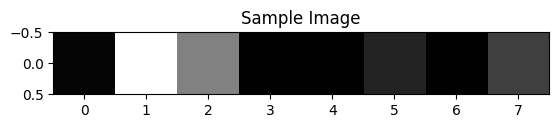

1/1 [==============================] - 0s 54ms/step
The model predicts diabetes.


In [8]:
import matplotlib.pyplot as plt


sample_image = X_test[1]


plt.imshow(sample_image.reshape(1, -1), cmap='gray')
plt.title("Sample Image")
plt.show()


prediction = my_nn.predict(np.array([sample_image]))


if prediction[0][0] >= 0.5:
    print("The model predicts diabetes.")
else:
    print("The model predicts no diabetes.")


In [9]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 7s 28ms/step - loss: 0.2917 - accuracy: 0.9099 - val_loss: 0.1738 - val_accuracy: 0.9430
Epoch 2/10
235/235 [==============================] - 7s 32ms/step - loss: 0.1000 - accuracy: 0.9696 - val_loss: 0.0801 - val_accuracy: 0.9750
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0627 - accuracy: 0.9806 - val_loss: 0.0793 - val_accuracy: 0.9740
Epoch 4/10
235/235 [==============================] - 7s 32ms/step - loss: 0.0430 - accuracy: 0.9866 - val_loss: 0.1047 - val_accuracy: 0.9691
Epoch 5/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0595 - val_accuracy: 0.9811
Epoch 6/10
235/235 [==============================] - 7s 32ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0727 - val_accuracy: 0.9795
Epoch 7/10
235/235 [==============================] - 6s 26ms/st